# Neural Artistic Style Transfer

This interactive notebook shows how to use the python package `style` for performing artistic style transfer between a source and a style image. 

Based on the work of
```
Gatys, L. A., Ecker, A. S., & Bethge, M. (2015). 
A neural algorithm of artistic style. 
https://arxiv.org/abs/1508.06576
```

Also incorporating ideas from

```
Johnson, J., Alahi, A., & Fei-Fei, L. (2016, October). 
Perceptual losses for real-time style transfer and super-resolution. 
In European Conference on Computer Vision (pp. 694-711). Springer, Cham.
https://arxiv.org/abs/1603.08155
```

In [74]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

import torch
import numpy as np
from IPython.display import display, clear_output
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Visualizing Style Transfer

Load a source image `p` and style image `a`.

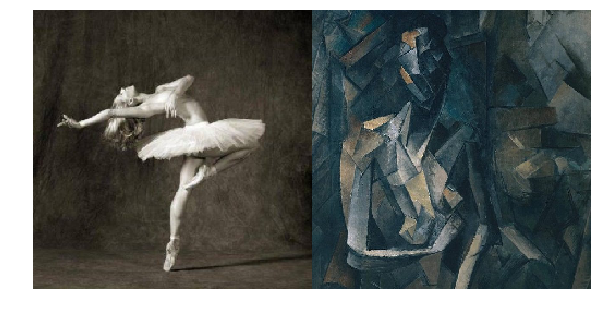

In [75]:
p = Image.open('etc/dancing.jpg').resize((256,256))
a = Image.open('etc/picasso.jpg')
a = a.resize(p.size)

plt.imshow(np.hstack((p,a)))
plt.axis('off')
plt.show()

Import `style` package

In [82]:
import style

st = style.IteratedStyleTransfer()

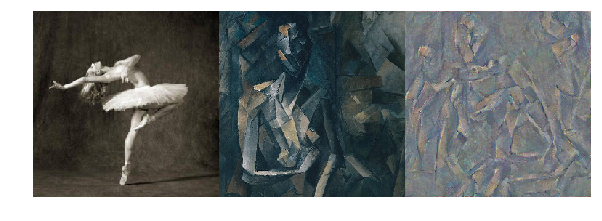

In [71]:
# Make sure we all see the same
torch.manual_seed(456)

# choose layers for content and style loss computation
c_id = st.conv_ids[6]
s_ids = st.conv_ids[[2,4,8]]

# get a generator object
g = st.iterate(p, a, c_id, s_ids, niter=800, lr=1e-2, weight_style_loss=1e2);

# and iterate (yields every 50 iterations)
fig, ax = plt.subplots()
img = ax.imshow(np.zeros((p.height, p.width, 3), dtype=np.float32))
ax.set_axis_off()

for x, l in g:
    print(l)
    clear_output(wait=True)
    img.set_data(style.to_np_image(x))
    display(fig)
clear_output(wait=True)

plt.imshow(np.hstack((p,a,style.to_pil_image(x))))
plt.axis('off')
plt.show()

## Multiscale

100%|███████████████████████████████████████| 200/200 [00:03<00:00, 56.12it/s, loss=[0.002 0.    0.002 0.   ], lr=0.01]


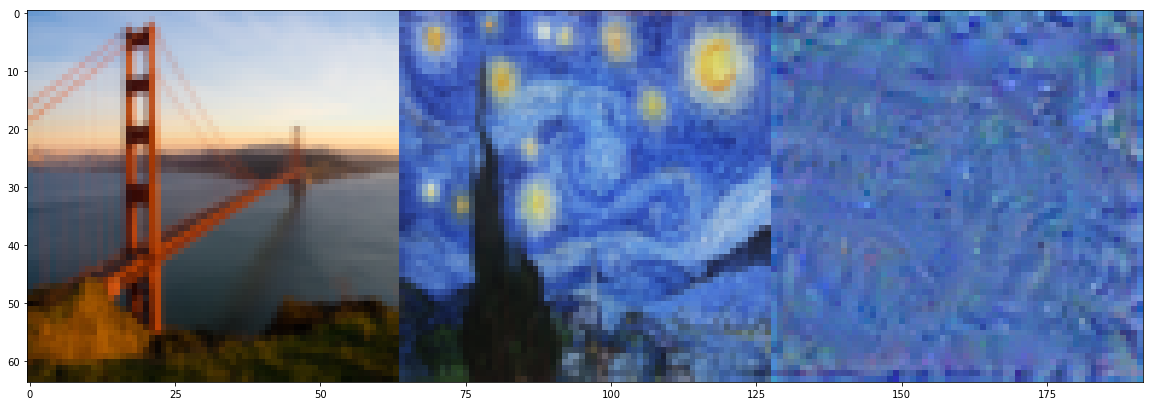

100%|███████████████████████████████████████| 200/200 [00:04<00:00, 43.87it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


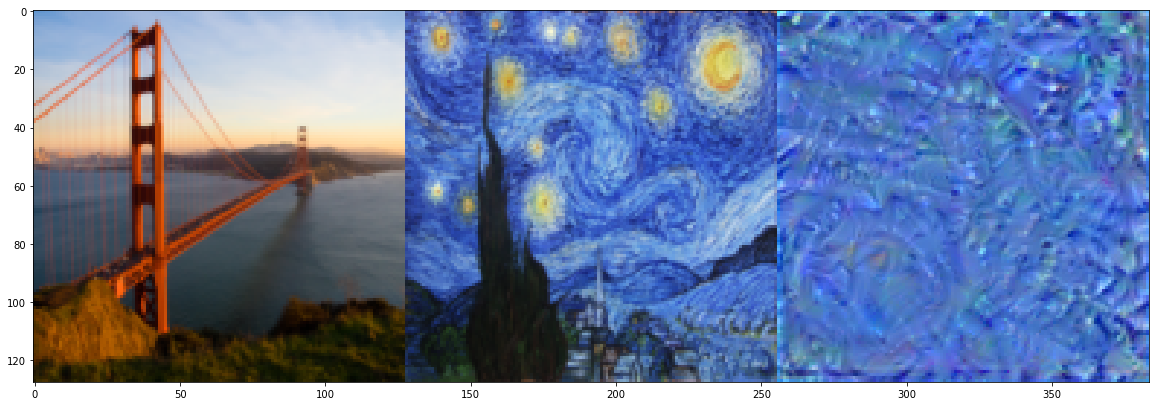

100%|███████████████████████████████████████| 200/200 [00:10<00:00, 18.89it/s, loss=[0.001 0.    0.001 0.   ], lr=0.01]


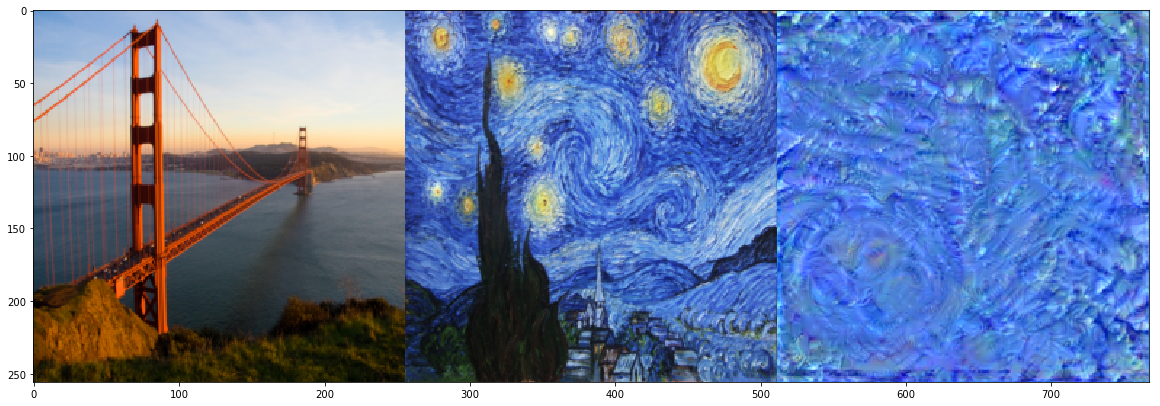

100%|███████████████████████████████████████████████████| 200/200 [00:37<00:00,  5.35it/s, loss=[0. 0. 0. 0.], lr=0.01]


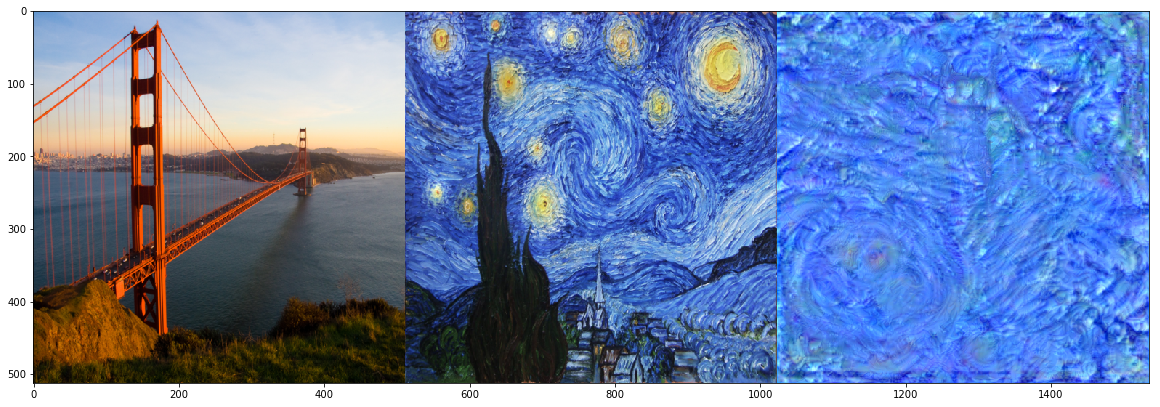

100%|███████████████████████████████████████████████████| 200/200 [01:34<00:00,  2.11it/s, loss=[0. 0. 0. 0.], lr=0.01]


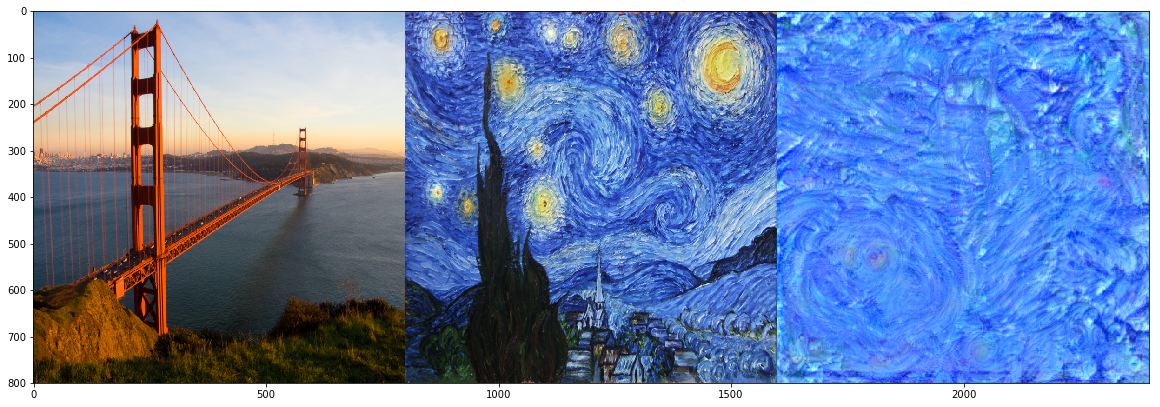

In [88]:
p = Image.open('Golden_Gate_Bridge.jpg')
a = Image.open('van_gogh-starry-night.jpg')

scales = [64, 128, 256, 512, 800]
c_id = st.conv_ids[8]
s_ids = st.conv_ids[[0,1,10]]
x = None
for s in scales:
    pscaled = p.resize((s, s), resample=Image.BILINEAR)
    ascaled = a.resize(pscaled.size, resample=Image.BILINEAR)
    ascaled = a
    
    if x is not None:
        x = x.resize((s, s), resample=Image.BILINEAR)
    
    x, _ = st.run(pscaled, ascaled, c_id, s_ids, niter=200, lr=1e-2, x=x, weight_tv_loss=0, weight_content_loss=0)
    x = style.to_pil_image(x)
    
    plt.figure(figsize=(20,8))
    plt.imshow(np.hstack((pscaled, a.resize(pscaled.size, resample=Image.BILINEAR), x)))
    plt.show()    

In [85]:
x.save('final.png')

## Parameter Evaluation

In [ ]:
from itertools import product

content_choices = [2, 4, 8, 12]
style_choices = [[1,2,4], [4,6,8], [8,10,12]]

images = []
for c,s in product(content_choices, style_choices):
    x = run_style_transfer(vgg, dev, tnorm(p), tnorm(a), layer_ids[c], layer_ids[s], niter=2000, lr=1e-2, wc=1e-3, ws=1e4);
    images.append(tdenorm(x.squeeze().cpu()))

In [ ]:
def gallery(array, ncols=3):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

In [ ]:
gall = gallery(np.array(images), ncols=3)

In [ ]:
plt.figure(figsize=(20,15))
plt.imshow(gall)